## Lab 4: Regression and K Nearest Neighbors
CS 133  
Dr. Henderson  
Spring 2025  
__Version 1__

In this lab you will try several types of regression and kNN on different datasets.

---

First import the libraries you'll need

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

The `cancer` dataset is set of samples of breast tumors and their diagnoses.

Load the `cancer.csv` dataset and inspect the features

In [2]:
df = pd.read_csv("cancer.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       512 non-null    int64  
 1   Diagnosis                512 non-null    object 
 2   Radius mean              512 non-null    float64
 3   Texture mean             512 non-null    float64
 4   Perimeter mean           512 non-null    float64
 5   Area mean                512 non-null    float64
 6   Smoothness mean          512 non-null    float64
 7   Compactness mean         512 non-null    float64
 8   Concavity mean           512 non-null    float64
 9   Concave points mean      512 non-null    float64
 10  Symmetry mean            512 non-null    float64
 11  Fractal dimension mean   512 non-null    float64
 12  Radius se                512 non-null    float64
 13   texture se              512 non-null    float64
 14  Perimeter se             5

,ID,Diagnosis,Radius mean,Texture mean,Perimeter mean,Area mean,Smoothness mean,Compactness mean,Concavity mean,Concave points mean,...,Radius worst,Texture worst,Perimeter worst,Area worst,Smoothness worst,Compactness worst,Concavity worst,Concave points worst,Symmetry worst,Fractal dimension worst
0,921362,B,7.691,25.44,48.34,170.4,0.08668,0.11990,0.09252,0.01364,...,8.678,31.89,54.49,223.6,0.1596,0.3064,0.3393,0.05000,0.2790,0.10660
1,908469,B,14.860,16.94,94.89,673.7,0.08924,0.07074,0.03346,0.02877,...,16.310,20.54,102.30,777.5,0.1218,0.1550,0.1220,0.07971,0.2525,0.06827
2,88330202,M,17.460,39.28,113.40,920.6,0.09812,0.12980,0.14170,0.08811,...,22.510,44.87,141.20,1408.0,0.1365,0.3735,0.3241,0.20660,0.2853,0.08496
3,862980,B,9.876,19.40,63.95,298.3,0.10050,0.09697,0.06154,0.03029,...,10.760,26.83,72.22,361.2,0.1559,0.2302,0.2644,0.09749,0.2622,0.08490
4,922840,B,10.260,16.58,65.85,320.8,0.08877,0.08066,0.04358,0.02438,...,10.830,22.04,71.08,357.4,0.1461,0.2246,0.1783,0.08333,0.2691,0.09479


The `Diagnosis` feature has two values `M` for _malignant_ and `B` for _benign_. Since this is a categorical feature, if we build a model to predict it the model we need to use a classification algorithm instead of regression. The kNN algorithm can do either classification or regression so we'll apply it to the `cancer` dataset. The first step is to prepare the data for the algorithm. The kNN algorithm will use all numeric values to determine distance. Look carefully at the features and decide if any should be removed.

Derive a dataframe named `X` from the `cancer` data without the target column (`Diagnosis`) and any other columns you think should not be included. Then create a series named `y` of the `Diagnosis` column values.

In [3]:
X = df.drop(columns=['Diagnosis', 'ID'])
y = df['Diagnosis']

Create an instance of the KNeighborsClassifier and call the `fit()` method on it passing in the `X` and `y` values you created above.

In [4]:
kNN = KNeighborsClassifier()
kNN.fit(X,y)

KNeighborsClassifier()

Use your model's `score()` method with the same `X` and `y` to get a score of the accuracy.

In [5]:
kNN.score(X,y)

0.943359375

The default number of neighbors (`k`) for the KNeighborsClassifier is 2. To find out what effect the value of `k` has on the accuracy use a loop to perform the three steps above (instantiate, fit, and score) for values of `k` from 1 to 20. Save the value of `k` and the accuracy for each iteration in a list, then make a line plot showing how accuracy changes over `k`.

   neighbors     score
1          3  0.955078


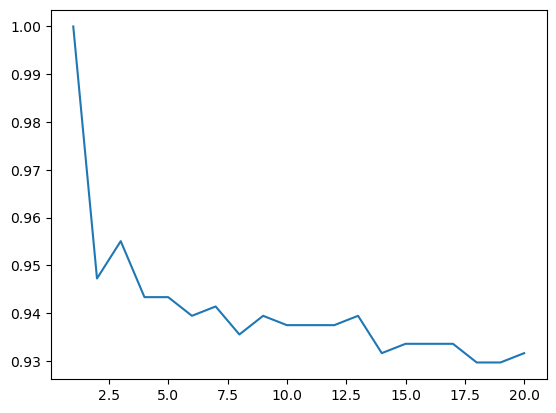

In [6]:
k = []
s = []
for i in range(20):
    kNN = KNeighborsClassifier(i+1)
    kNN.fit(X,y)
    k.append(i+1)
    s.append( kNN.score(X,y) )

sns.lineplot(x=k, y=s)

test_dataframe = pd.DataFrame({
    'neighbors' : k[1:],
    'score' : s[1:]
})

test_dataframe = test_dataframe[0:] # dropping our first value to find a real maximum

print(test_dataframe[test_dataframe.score == test_dataframe.score.max()])

Why does `k=1` get a perfect score? What is the next best value of `k`?

k = 1 gives a perfect score because its not averaging out the distances between multiple neighboors.

Use your best value (greater than 1) for `k` to create another model.

In [7]:
kNN = KNeighborsClassifier(3)
kNN.fit(X, y)
kNN.score(X,y)

0.955078125

You have been testing with the same data the model is using for prediction, which means every test data point exists in the "training" set. This does not give any information about how the model will perform on "unseen" or test data that the model has not encountered before.

Load the `cancer-test.csv` file and use the same method above to create the test input features `Xt` and the test output values `yt`.

In [8]:
df2 = pd.read_csv("cancer-test.csv")
Xt = df2.drop(columns=['Diagnosis', 'ID'])
yt = df2['Diagnosis']
kNN.score(Xt,yt)


0.9824561403508771

Score your model using the `Xt`, `yt` values

In [9]:
kNN.score(Xt,yt)

0.9824561403508771

Repeat the experiment above that plots the accuracy vs. `k` values by copying that cell here and editing the call to the model score method to use `Xt`,`yt` instead of `X`,`y`. Be sure you still use `X`,`y` when fitting your model.

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] 
 [0.9473684210526315, 0.9473684210526315, 0.9824561403508771, 0.9649122807017544, 0.9473684210526315, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.9649122807017544, 0.9649122807017544, 0.9473684210526315, 0.9473684210526315, 0.9298245614035088, 0.9122807017543859, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088]
   neighbors     score
2          3  0.982456


<Axes: >

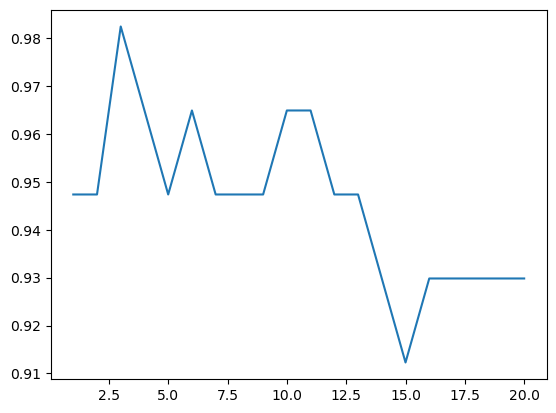

In [10]:
k = []
s = []

for i in range(20):
    kNN = KNeighborsClassifier(i+1)
    kNN.fit(X,y)
    k.append(i+1)
    s.append( kNN.score(Xt,yt) )

print(k, "\n",  s)

training_dataframe = pd.DataFrame({
    'neighbors' : k,
    'score' : s
})

training_dataframe = training_dataframe[0:] # dropping our first value to find a real maximum

print(training_dataframe[training_dataframe.score == training_dataframe.score.max()])

sns.lineplot(x=k, y=s)



Is your model's best `k` value the same as before?

In this case yes, having 3 neighbors gives the best score.

---

### Polynomial vs. kNN Regression

In the next set of experiments we will compare the performance of multiple polynomial regression with kNN regression.

Load the `country.csv` dataset and inspect the features

In [11]:
country = pd.read_csv('country.csv')
country.info()
country.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     150 non-null    object 
 1   child_mort  150 non-null    float64
 2   exports     150 non-null    float64
 3   health      150 non-null    float64
 4   imports     150 non-null    float64
 5   income      150 non-null    int64  
 6   inflation   150 non-null    float64
 7   life_expec  150 non-null    float64
 8   total_fer   150 non-null    float64
 9   gdpp        150 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 11.8+ KB


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Saudi Arabia,15.7,49.60,4.29,33.0,45400,17.200,75.1,2.96,19300
1,Netherlands,4.5,72.00,11.90,63.6,45500,0.848,80.7,1.79,50300
2,Panama,19.7,70.00,8.10,78.2,15400,2.590,77.8,2.62,8080
3,Nepal,47.0,9.58,5.25,36.4,1990,15.100,68.3,2.61,592
4,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769


This dataset gives a number of attributes of countries around the world, including life expectancy. For a regression problem we can try to predict life expectancy using the other attributes.

Create the training input variables `X` by dropping `country` and `life_expec`. Create the target values `y` from the `life_expec` column.

In [12]:
X = country.drop(columns=['country', 'life_expec'])
y = country.life_expec

As a baseline we will use a simple linear regressor. Create an instance of the `LinearRegression` class and fit a model using `X` and `y`. Give it a unique name so we can use it later.

In [13]:
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

To use a polynomial regression we use the `PolynomialFeatures` class to transform the input variables `X` to include all the polynomial terms.

Create an instance of the `PolynomialFeatures` class with `degree=2`, then call the `fit_transform()` method passing in the value `X` and assign the name `X2` to the result

In [14]:
poly2 = PolynomialFeatures(degree=2)
X2 = poly2.fit_transform(X)

Now that we have `X2` with all second-degree polynomial terms, the standard `LinearRegression` can be applied. Create and fit a `LinearRegression` model using the `X2` and `y` input values. Be sure to give it a unique name so we can use it later.

In [15]:
lr2 = LinearRegression()
lr2.fit(X2, y)

LinearRegression()

Repeat the steps above for a third-degree polynomial model (use `degree=3` when creating the `PolynomialFeatures`).

In [16]:
poly3 = PolynomialFeatures(degree=3)
X3 = poly3.fit_transform(X)
lr3 = LinearRegression()
lr3.fit(X3, y)

LinearRegression()

We'll want to score each model using both the training and test data.  

Load the `country-test.csv` file and create the test input data `Xt`, `yt` as we did in the previous section above for the training data.

In [17]:
country_test = pd.read_csv('country-test.csv')
Xt = country_test.drop(columns=['country', 'life_expec'])
yt = country_test.life_expec


When scoring polynomial models, you will need to transform your test data the same way you transformed your training data.

Create lists of scores from all three of your models for both the training and test data, i.e. one list will have the training scores and the other list will have the test scores. Any score that is below 0 should be set to 0.

In [18]:
train_scores = [lr.score(X,y), lr2.score(X2, y), lr3.score(X3, y)]
test_scores = [lr.score(Xt,yt), lr2.score(poly2.fit_transform(Xt), yt), lr3.score(poly3.fit_transform(Xt), yt)]

train_scores = [ 0 if s < 0 else s for s in train_scores]
test_scores = [ 0 if s < 0 else s for s in test_scores]

train_scores, test_scores

([0.8576544323645138, 0.9202685680892837, 0.9879304092149067],
 [0.5885746577004871, 0.442071408551413, 0])

Using your lists of scores create a grouped (not stacked) bar graph that is grouped by model and shows the training and test scores for each model. _Hint: Create a dataframe with three columns (`model`, `type`, `score`) and create one row in the dataframe for each of the six scores_

<Axes: xlabel='model', ylabel='score'>

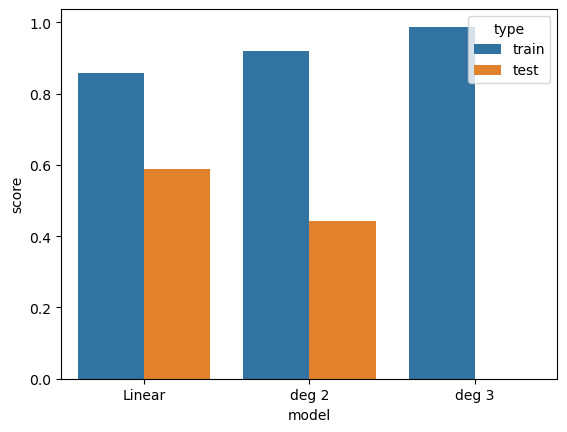

In [19]:
rows = []
models = [ 'Linear', 'deg 2', 'deg 3', 'Regressor' ]
for i in range(len(train_scores)):
    rows.append([models[i], 'train', train_scores[i]])
for i in range(len(test_scores)):
    rows.append([models[i], 'test', test_scores[i]])

df_scores = pd.DataFrame(rows,columns=['model','type','score'])

sns.barplot(df_scores, x = 'model', y= 'score', hue='type')

Create an instance of the KNeighborsRegressor using your own choice of `k` and fit the model on the `X`, `y` training values.

In [20]:
kNR = KNeighborsRegressor(3)
kNR.fit(X,y)

KNeighborsRegressor(n_neighbors=3)

Score your knn model using both the training and test data

In [21]:
kNR.score(X,y), kNR.score(Xt,yt)

(0.7956040466867581, 0.41397784166538687)

Compare the performance of the two types of models

I think based on what the scores look like for each of the models a higher degree polynomial or using the Regressor model is actually worse than a standard linear model, because of how it scored against test data. Sure when using our training data our models scores well and as you increase degrees of the polynomial it scores higher along with leading towards overfitting but when given test data we can see that a standard linear regression out preforms others models.

---

### Submission Instructions

Be sure to ***SAVE YOUR WORK***!  

Next, select File -> Save and Export As ... -> HTML

Then submit your notebook HTML file to Canvas.